# Linear Regression from Scratch — Step-by-Step Implementation

This notebook demonstrates how to build a simple **Linear Regression model from scratch** using only `numpy`, `pandas`, and `matplotlib`. We'll:

1. Generate a simple dataset.
2. Visualize it.
3. Save it for later use.
4. Implement **gradient descent** manually to find the best-fit line.

Let's start by generating the dataset.

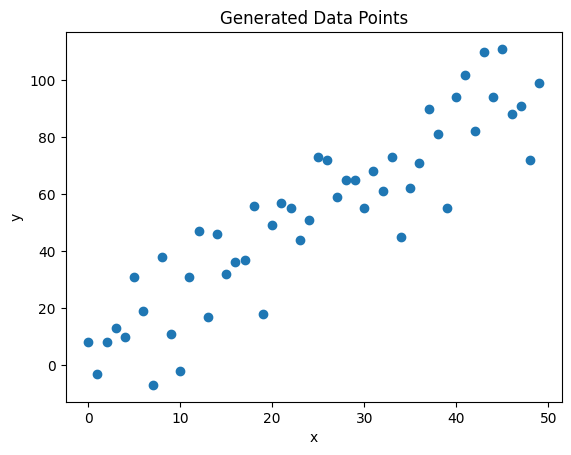

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 49
x = np.arange(50)

# Generate y values with a linear relationship and random noise
y = []
for point in x:
    y.append(point * 2 + np.random.randint(-25, 25))  # y = 2x + noise

# Visualize the data points
plt.scatter(x, y)
plt.title('Generated Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Step 1: Convert Data into a DataFrame

We'll store our `x` and `y` values into a pandas DataFrame for easier handling and future processing.

In [27]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame(x)
df['y'] = y
df.columns = ['x', 'y']

# Display first few rows
df.head()

,x,y
0,0,8
1,1,-3
2,2,8
3,3,13
4,4,10


## Step 2: Visualize the Dataset Again

We’ll confirm the linear trend between `x` and `y` using a scatter plot.

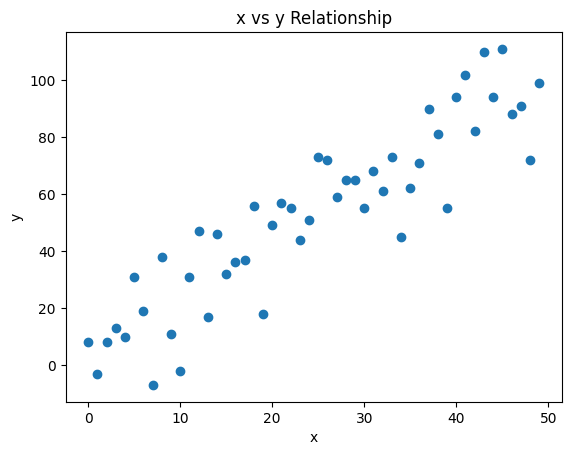

In [28]:
plt.scatter(df['x'], df['y'])
plt.title('x vs y Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Step 3: Save the Dataset

We’ll save our generated dataset to a CSV file so that we can reuse it when training our regression model.

In [29]:
df.to_csv('xy dataset.csv', index=False)
print(f"Dataset saved with {len(df)} records.")

Dataset saved with 50 records.


# Step 4: Implementing Linear Regression from Scratch

We'll now implement our own **loss function** and **gradient descent** function to find the best-fit line.

**Goal:** Minimize the Mean Squared Error (MSE) between actual and predicted values.

In [31]:
import pandas as pd
import numpy as np

# Mean Squared Error (Loss Function)
def lossfunction(m, b, points):
    loss = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y
        loss += (y - ((m * x) + b)) ** 2
    return loss / len(points)

# Gradient Descent Function
def gradient_descent(mnow, bnow, points, L):
    mgradient = 0
    bgradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        mgradient += (-2 / n) * (y - ((mnow * x) + bnow)) * x
        bgradient += (-2 / n) * (y - ((mnow * x) + bnow))
    m = mnow - L * mgradient
    b = bnow - L * bgradient
    return m, b

## Step 5: Load the Dataset and Train the Model

We’ll load the saved dataset and apply our gradient descent function for several iterations (epochs) to find the optimal `m` and `b` values.

In [32]:
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv('xy dataset.csv')

# Initialize parameters
m, b = 0, 0
L = 0.0001  # Learning rate
epochs = 1000

# Perform gradient descent
for i in range(epochs):
    if i % 50 == 0:
        print(f'Epoch: {i}')
    m, b = gradient_descent(m, b, df, L)

print('Final parameters:')
print(f'm = {m}, b = {b}')

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600
Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800
Epoch: 850
Epoch: 900
Epoch: 950
Final parameters:
m = 2.0911679631495836, b = 0.31953050164417485


## Step 6: Plot the Best Fit Line

Now that we have our slope (`m`) and intercept (`b`), we can plot the regression line against our original data.

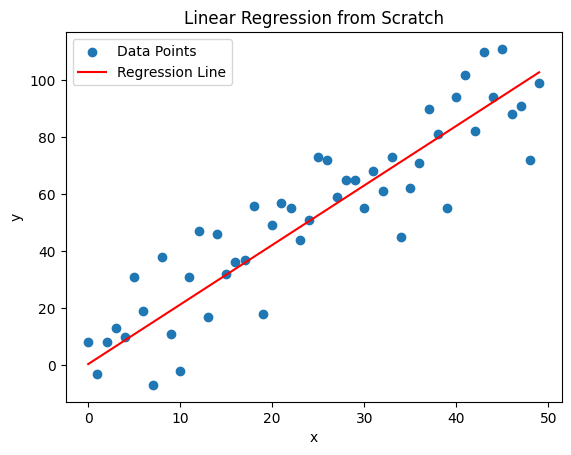

In [33]:
linex = np.arange(50)
liney = []
for i in linex:
    liney.append((m * i) + b)

# Save the line data
linedf = pd.DataFrame(linex)
linedf['y'] = liney
linedf.columns = ['x', 'y']
linedf.to_csv('line.csv', index=False)

# Plot the regression line
plt.scatter(df.x, df.y, label='Data Points')
plt.plot(linex, liney, color='red', label='Regression Line')
plt.title('Linear Regression from Scratch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## ✅ Summary
- We generated our own dataset.
- Implemented gradient descent manually.
- Trained the model to estimate the best-fit line.
- Visualized the regression line over our data.

This notebook walks through your full workflow — clear, step-by-step, and executable as-is.